In [1]:
# Necessary

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Initialising the maze
class Maze:
    def __init__(self, maze, start_position, goal_position, sub_goal_position):
        self.maze = maze
        
        self.maze_width = maze_struc.shape[1]           # rows of maze, also knows as x-azis. 
        self.maze_height = maze_struc.shape[0]          # columns of maze, also known as y-axis.

        self.start_position = start_position            # start position - S.
        self.goal_position = goal_position              # end goal position - E.
        self.sub_goal_position = sub_goal_position      # sub goal position - G.

    def show_maze(self):
        plt.figure(figsize=(5,5))

        plt.imshow(self.maze, cmap='Pastel1')

        # Placements for the start, end, and sub goal positions.
        plt.text(self.start_position[0], self.start_position[1], 'S', ha='center', va='center', color='green', fontsize=15)
        plt.text(self.goal_position[0], self.goal_position[1], 'E', ha='center', va='center', color='red', fontsize=15)
        plt.text(self.sub_goal_position[0], self.sub_goal_position[1], 'G', ha='center', va='center', color='blue', fontsize=15)

        # Add grid lines between every wall/space.
        plt.grid(color='black', linestyle='-', linewidth=0.5)
        plt.xticks(np.arange(0.5, self.maze.shape[1], 1))
        plt.yticks(np.arange(0.5, self.maze.shape[0], 1))
        plt.gca().set_xticks(np.arange(-0.5, self.maze.shape[1], 1), minor=True)
        plt.gca().set_yticks(np.arange(-0.5, self.maze.shape[0], 1), minor=True)
        plt.gca().grid(which='minor', color='grey', linestyle='-', linewidth=0.5)
        plt.gca().tick_params(which='both', length=0)

        plt.xlim(-0.45, self.maze.shape[1] - 0.5)
        plt.ylim(self.maze.shape[0] - 0.6, -0.4)

        # Hide the digits and labels from the plot visualistion. 
        plt.xticks([]), plt.yticks([])

        # Ensures the plot will visualise when running the code.
        plt.show()


# The layout of the 10x10 maze:
# 1 = wall.
# 0 = open area.
# (If wanted, we can later make another file where we can generate larger mazes like 100x100).
maze_struc = np.array([
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 1, 0, 0, 0, 1, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 1, 1, 1, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
    [1, 1, 1, 0, 1, 0, 1, 1, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
])

# Places the start, end, and sub goal at the correct coordinates (rows, columns).
maze = Maze(maze_struc, (1, 1), (7, 8), (3,5))

# Actually visualises the plot with matplotlib.
# maze.show_maze()

# Actions the agent can take.
moves = [
   (-1, 0),         # Moving one step up.
   (1, 0),          # Moving one step down.
   (0, -1),         # Moving one step left.
   (0, 1)           # Moving one step right.
]

# Initialise the Q-Learning agent 
class QLearningAgent:
    def __init__(self, maze, learning_rate=0.1, discount_factor=0.9, exploration_start=1.0, exploration_end=0.01, num_episodes=100):
        
        # The table gets updated as new information is stored. 4 stands for the actions the agent can take. 
        self.q_table = np.zeros((maze.maze_height, maze.maze_width, 4)) 
         
        self.learning_rate = learning_rate          
        self.discount_factor = discount_factor      
        self.exploration_start = exploration_start  
        self.exploration_end = exploration_end
        self.num_episodes = num_episodes

    # Calculates the rate of exploration to exploitation over time -> start with a lot of exploration and eventually prefer exploitation.
    def get_exploration_rate(self, current_episode):
        exploration_rate = self.exploration_start * (self.exploration_end / self.exploration_start) ** (current_episode / self.num_episodes)
        return exploration_rate
    
    # Chooses what movement action to make. 
    def get_action(self, state, current_episode):
        exploration_rate = self.get_exploration_rate(current_episode)

        # Select an action for the given state either randomly (exploration) or using the Q-table (exploitation).
        if np.random.rand() < exploration_rate:
            return np.random.randint(4) 
        else:
            #Chooses the action with the highest Q-value for the given state.
            return np.argmax(self.q_table[state]) 
        
    # Updates the Q-values in the Q-table based on its actions and states.
    def update_q_table(self, state, action, next_state, reward):
        best_next_action = np.argmax(self.q_table[next_state])

        current_q_value = self.q_table[state][action]

        # Formula to update the Q-value based on the theory of the Q-Learning algorithm.
        new_q_value = current_q_value + self.learning_rate * (reward + self.discount_factor * self.q_table[next_state][best_next_action] - current_q_value)

        # Apply new Q-value for current action and state. 
        self.q_table[state][action] = new_q_value

# Rewards.
goal_reward = 100
sub_goal_reward = 50

# Penalities.
wall_penalty = -10
step_penalty = -1

# Shows a single episode of the agent (untrained).
def test_agent(agent, maze, num_episodes):

    for episode in range(num_episodes):
        episode_reward, episode_step, path, sub_reached, goal_reached = qlearning_logic(agent, maze, num_episodes, train=False)

    # Shows the path it took, total steps and total reward.
    print("Final Path:")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("End Reached.")

    print("Total steps:", episode_step)
    print("Total reward:", episode_reward)

    # Visualize the maze with the agent's path.
    visualize_maze(maze, path, sub_reached)
    return episode_step, episode_reward


def qlearning_logic(agent, maze, current_episode, train=True):

    current_state = maze.start_position     # Agent starts at start position.
    path = [current_state]                  # Tracks the agent's current position.

    goal_reached = False                    # Tracks if the agent reached the goal.
    sub_reached = False                     # Tracks if the agent reached the sub goal.

    episode_reward = 0                      # Tracks the agent's total reward at the end of the episode.
    episode_step = 0                        # Tracks the agent's total steps at the end of the episode.
    
    while not goal_reached:

        # Decide the agent's next action based on the Q-Table.
        action = agent.get_action(current_state, current_episode)
        next_state = (current_state[0] + moves[action][0], current_state[1] + moves[action][1])

        # Give a penalty if a wall is hit.
        if (next_state[0] < 0 or next_state[0] >= maze.maze_height or 
            next_state[1] < 0 or next_state[1] >= maze.maze_width or 
            maze.maze[next_state[1]][next_state[0]] == 1):
            reward = wall_penalty
            next_state = current_state

        # Give a single-time reward if the sub-goal is reached.
        elif next_state == maze.sub_goal_position and not sub_reached:
            path.append(current_state)
            reward = sub_goal_reward
            sub_reached = True

        # Mark that the agent has reached the end and give a reward.
        elif next_state == maze.goal_position:
            path.append(current_state)
            reward = goal_reward
            goal_reached = True

        # Give a penalty every time the agent takes a step without reaching the final goal position.
        else:
            path.append(current_state)
            reward = step_penalty

        # Track the total steps and reward.
        episode_reward += reward
        episode_step += 1

        # Update Q-table if training is set to True.
        if train:
            agent.update_q_table(current_state, action, next_state, reward)

        # Update the agent's current position.
        current_state = next_state

    # Return total reward, steps, path, and whether the sub-goal was reached.
    return episode_reward, episode_step, path, sub_reached, goal_reached

# A helper function to visualise the maze.
def visualize_maze(maze, path, sub_goal_reached):
    plt.figure(figsize=(5, 5))
    plt.imshow(maze.maze, cmap='Pastel1')
    
    plt.text(maze.start_position[0], maze.start_position[1], 'S', ha='center', va='center', color='green', fontsize=15)
    plt.text(maze.goal_position[0], maze.goal_position[1], 'E', ha='center', va='center', color='red', fontsize=15)
    plt.text(maze.sub_goal_position[0], maze.sub_goal_position[1], 'G', ha='center', va='center', color='blue', fontsize=15)

    plt.grid(color='black', linestyle='-', linewidth=0.5)
    plt.xticks(np.arange(0.5, maze.maze.shape[1], 1))
    plt.yticks(np.arange(0.5, maze.maze.shape[0], 1))
    plt.gca().set_xticks(np.arange(-0.5, maze.maze.shape[1], 1), minor=True)
    plt.gca().set_yticks(np.arange(-0.5, maze.maze.shape[0], 1), minor=True)
    plt.gca().grid(which='minor', color='grey', linestyle='-', linewidth=0.5)
    plt.gca().tick_params(which='both', length=0)

    plt.xlim(-0.45, maze.maze.shape[1] - 0.5)
    plt.ylim(maze.maze.shape[0] - 0.6, -0.4)

    # Additionally show the path the agent took.
    for position in path:
        plt.text(position[0], position[1], "●", va='center', color='white', fontsize=8)

    plt.xticks([]), plt.yticks([])
    plt.show(block=True)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

def train_agent(agent, maze, num_episodes=100, show_plot=True):
    
    # Store the data for the rewards and the steps (for plotting purposes).
    episode_rewards = []
    episode_steps = []
    sub_success_count = 0
    goal_success_count = 0

    # Create a visit count matrix to store how many times the agent visited each tile.
    visit_count = np.zeros((maze.maze_height, maze.maze_width))

    # Loop over the number of episodes.
    for episode in range(num_episodes):
        episode_reward, episode_step, path, sub_reached, goal_reached = qlearning_logic(agent, maze, episode, train=True)

        # Loop over the path the agent took and increment the visit count for each tile.
        for position in path:
            visit_count[position[1], position[0]] += 1  # Increment visit count for each position

        # Add the rewards and steps to their respective lists.
        episode_rewards.append(episode_reward)
        episode_steps.append(episode_step)
        if sub_reached:
            sub_success_count += 1
        if goal_reached:
            goal_success_count += 1
    
    # Measure success rate by counting episodes where the goal is reached
    success_rate = (goal_success_count / num_episodes) * 100

    # Measure sub-goal success rate by counting episodes where the sub-goal is reached
    sub_success_rate = (sub_success_count / num_episodes) * 100

    # Calculate the moving average of rewards and steps to smooth out the data
    # window_size = 10
    # moving_avg_rewards = np.convolve(episode_rewards, np.ones(window_size)/window_size, mode='valid')
    # moving_avg_steps = np.convolve(episode_steps, np.ones(window_size)/window_size, mode='valid')

    avg_steps = np.mean(episode_steps)
    avg_rewards = np.mean(episode_rewards)


    # Find the convergence speed by checking when the steps hit a minimum and never increase after
    min_steps = min(episode_steps)
    convergence_episode = next((i for i, steps in enumerate(episode_steps) if steps == min_steps and all(s >= steps for s in episode_steps[i:])), None)

    # Calculate variance in rewards and steps
    reward_variance = np.var(episode_rewards)
    steps_variance = np.var(episode_steps)

    # Create subplots
    fig = make_subplots(rows=1, cols=2, subplot_titles=('Reward per Episode', 'Steps per Episode'))

    # Add reward plot
    fig.add_trace(go.Scatter(x=list(range(num_episodes)), y=episode_rewards, mode='lines', name='Rewards'), row=1, col=1)
    # fig.add_trace(go.Scatter(x=list(range(window_size-1, num_episodes)), y=moving_avg_rewards, mode='lines', name='Moving Avg Rewards'), row=1, col=1)
    fig.update_xaxes(title_text='Episode', row=1, col=1)
    fig.update_yaxes(title_text='Cumulative Reward', row=1, col=1)

    # Add steps plot
    fig.add_trace(go.Scatter(x=list(range(num_episodes)), y=episode_steps, mode='lines', name='Steps'), row=1, col=2)
    # fig.add_trace(go.Scatter(x=list(range(window_size-1, num_episodes)), y=moving_avg_steps, mode='lines', name='Moving Avg Steps'), row=1, col=2)
    fig.update_xaxes(title_text='Episode', row=1, col=2)
    fig.update_yaxes(title_text='Steps Taken', row=1, col=2)

    # Plot the heat map
    plt.figure(figsize=(5, 5))
    plt.imshow(visit_count, cmap='hot', interpolation='nearest')
    plt.colorbar(label='Visit Count')
    plt.title('Heat Map of Tiles Visited by Agent')
    # plt.show()

    # Print the final reward and steps after training finished.
    final_reward = episode_rewards[-1]
    final_steps = episode_steps[-1]

    if show_plot:
        fig.show()
        plt.show()
        print(f"The final reward after training is: {final_reward}")
        print(f"The final steps after training are: {final_steps}")
        print(f"Sub-goal success rate: {sub_success_rate}%")
        print(f"Success rate: {success_rate}%")
        print(f"Average steps per episode: {avg_steps}")
        print(f"Average rewards per episode: {avg_rewards}")
        if convergence_episode is not None:
            print(f"The agent converged to a minimum step count of {min_steps} at episode: {convergence_episode}")
        else:
            print("The agent did not converge to a minimum step count within the given episodes.")

    return avg_steps, avg_rewards, sub_success_rate, success_rate, visit_count 


In [2]:
# Train over 10 runs

def train_over_n_runs(agent, n, learning_rate, show_plot=False):
    convergence_speeds = []
    success_rates = []
    average_steps_per_episode = []
    average_rewards_per_episode = []

    for _ in range(n):
        agent = QLearningAgent(maze, learning_rate, show_plot)
        train_agent(agent, maze, num_episodes=100)
        
        # Collect the metrics
        episode_rewards = []
        episode_steps = []
        for episode in range(100):
            episode_reward, episode_step, _, _ = qlearning_logic(agent, maze, episode, train=False)
            episode_rewards.append(episode_reward)
            episode_steps.append(episode_step)
        
        # Measure success rate by counting positive rewards
        success_count = sum(1 for reward in episode_rewards if reward > 0)
        success_rate = (success_count / 100) * 100
        success_rates.append(success_rate)
        
        # Find the convergence speed by checking when the steps hit a minimum and never increase after
        min_steps = min(episode_steps)
        convergence_episode = next((i for i, steps in enumerate(episode_steps) if steps == min_steps and all(s >= steps for s in episode_steps[i:])), None)
        if convergence_episode is not None:
            convergence_speeds.append(convergence_episode)
        
        average_steps_per_episode.append(np.mean(episode_steps))
        average_rewards_per_episode.append(np.mean(episode_rewards))

    # Calculate the averages
    avg_convergence_speed = np.mean(convergence_speeds)
    avg_success_rate = np.mean(success_rates)
    avg_steps_per_episode = np.mean(average_steps_per_episode)
    avg_rewards_per_episode = np.mean(average_rewards_per_episode)

    print(f"Average Convergence Speed: {avg_convergence_speed}")
    print(f"Average Success Rate: {avg_success_rate}%")
    print(f"Average Steps per Episode: {avg_steps_per_episode}")
    print(f"Average Reward per Episode: {avg_rewards_per_episode}")

In [3]:
# Random agent

class RandomAgent:
    def __init__(self, maze):
        self.maze = maze

    def get_action(self, state, current_episode):
        return np.random.randint(4)

    def run_episode(self):
        state = self.maze.reset()
        done = False
        steps = 0

        while not done:
            action = self.get_action(state)
            next_state, reward, done = self.maze.step(action)
            state = next_state
            steps += 1

        return steps

## Trained Agent with Learning Rate = 0.9

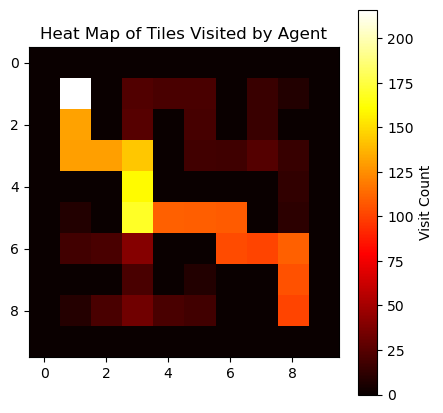

The final reward after training is: 137
The final steps after training are: 15
Sub-goal success rate: 96.0%
Success rate: 100.0%
Average steps per episode: 24.32
Average rewards per episode: 113.04
The agent converged to a minimum step count of 15 at episode: 19


(24.32,
 113.04,
 96.0,
 100.0,
 array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0., 216.,   0.,  23.,  21.,  21.,   0.,  16.,   8.,   0.],
        [  0., 131.,   0.,  25.,   0.,  20.,   0.,  16.,   0.,   0.],
        [  0., 130., 130., 143.,   0.,  18.,  17.,  24.,  15.,   0.],
        [  0.,   0.,   0., 160.,   0.,   0.,   0.,   0.,  13.,   0.],
        [  0.,   8.,   0., 169., 110., 109., 108.,   0.,  11.,   0.],
        [  0.,  18.,  21.,  40.,   0.,   0., 103., 101., 110.,   0.],
        [  0.,   0.,   0.,  21.,   0.,   8.,   0.,   0., 105.,   0.],
        [  0.,   9.,  21.,  33.,  21.,  18.,   0.,   0., 101.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]))

In [4]:
agent = QLearningAgent(maze, learning_rate=0.9, discount_factor=0.5, exploration_start=0.1)

train_agent(QLearningAgent(maze, learning_rate=0.9, discount_factor=0.5, exploration_start=0.1), maze, num_episodes=100, show_plot=True)


C:\Users\camis\AppData\Local\Temp\ipykernel_18816\2877454128.py:26: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

C:\Users\camis\AppData\Local\Temp\ipykernel_18816\1460815391.py:300: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



PermissionError: [Errno 13] Permission denied: 'q_learning_results.csv'

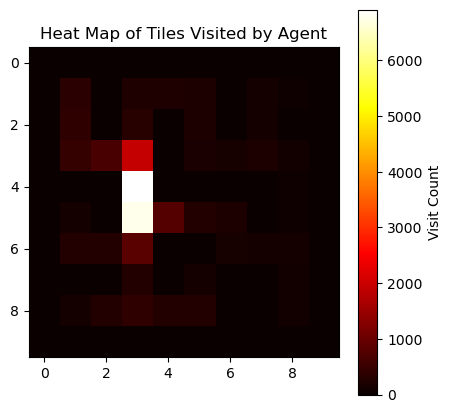

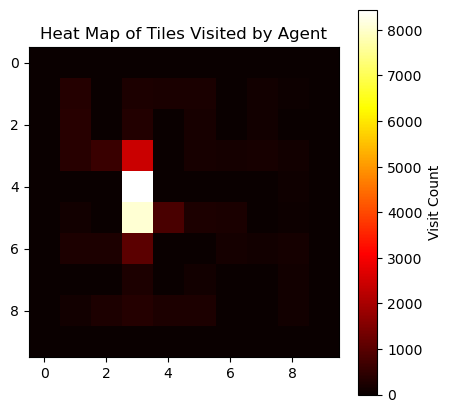

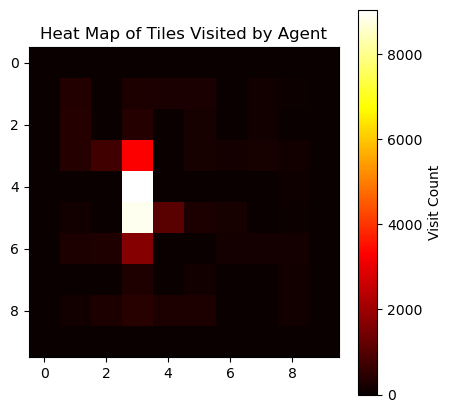

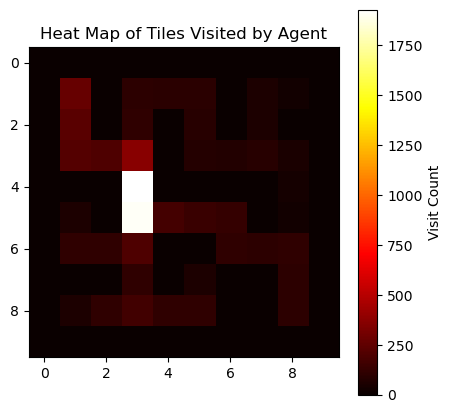

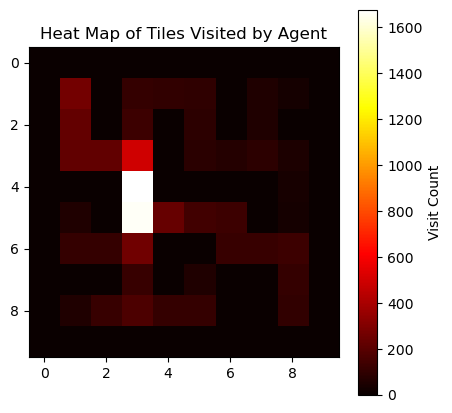

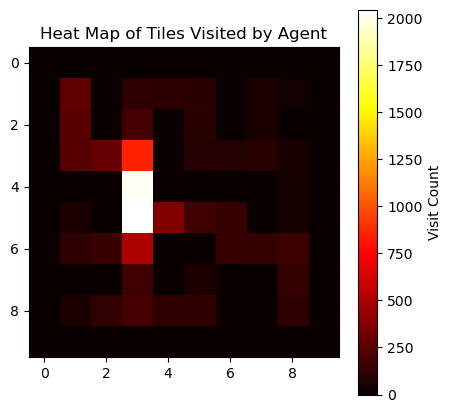

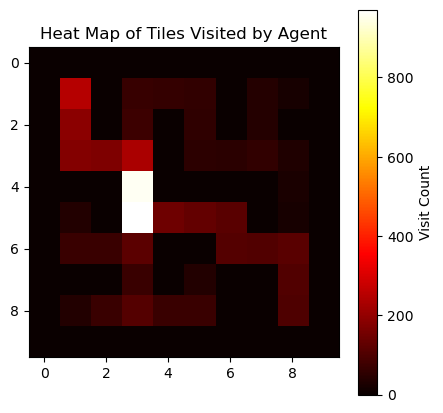

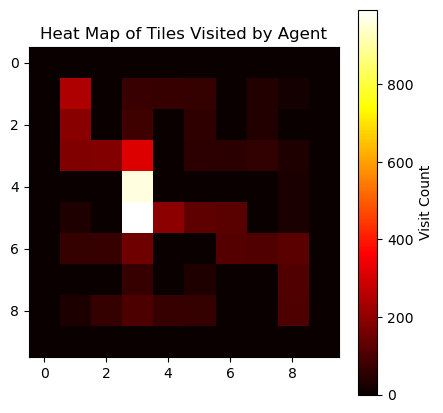

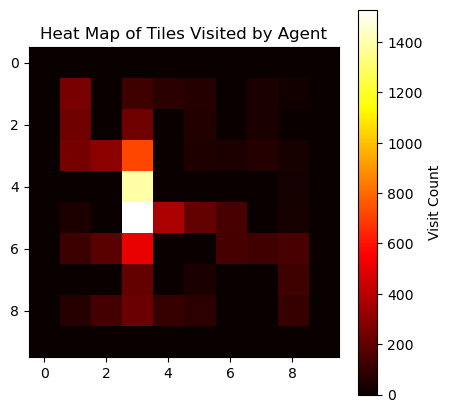

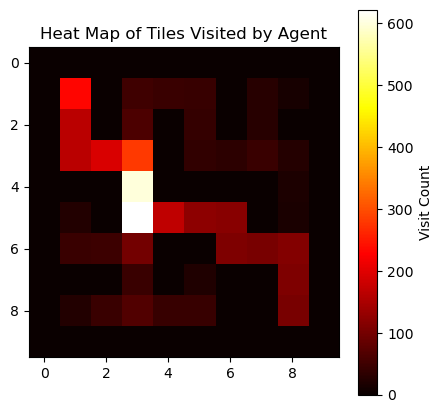

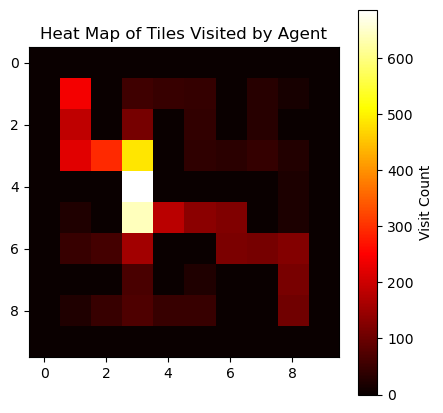

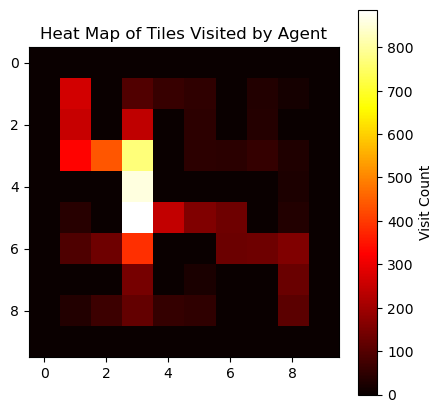

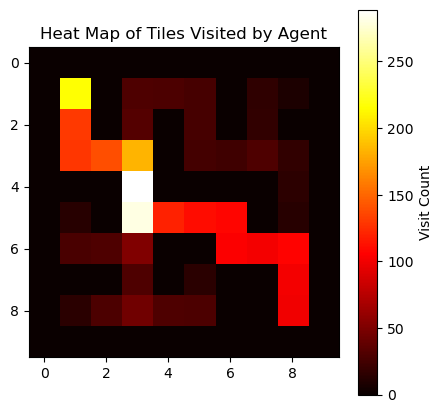

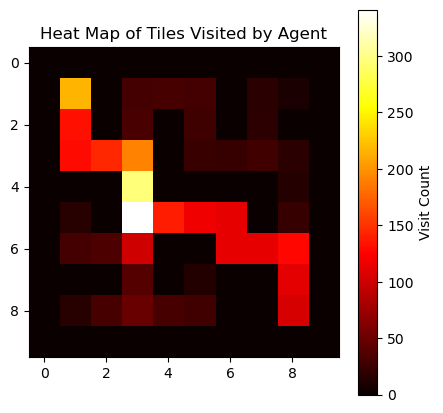

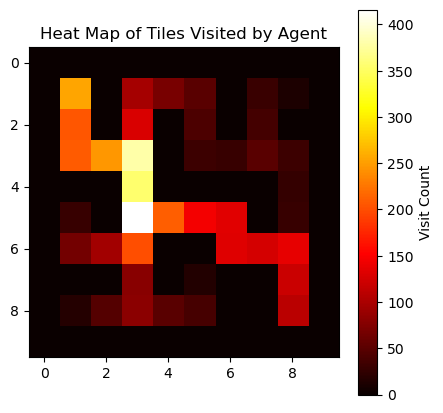

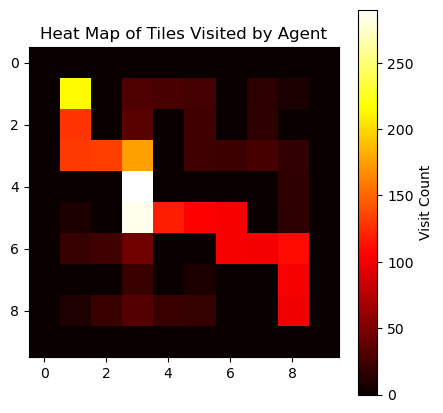

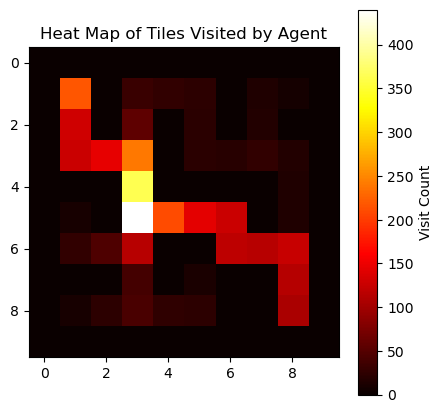

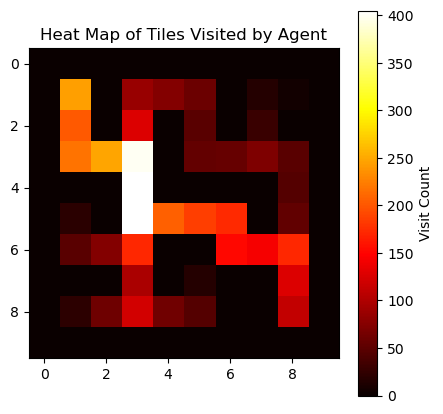

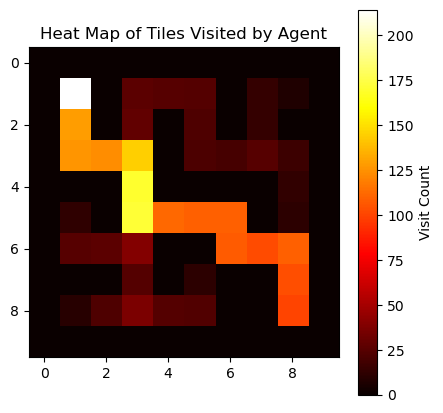

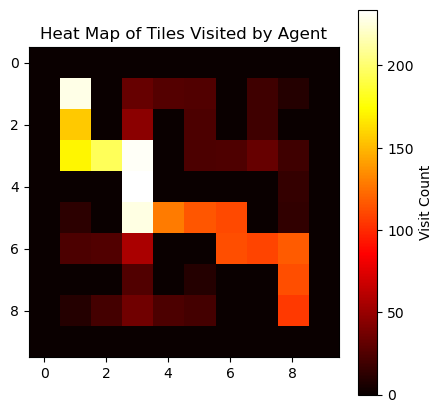

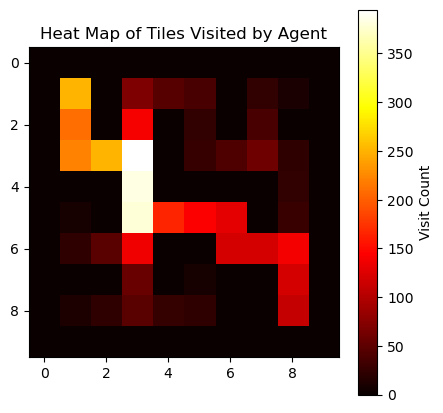

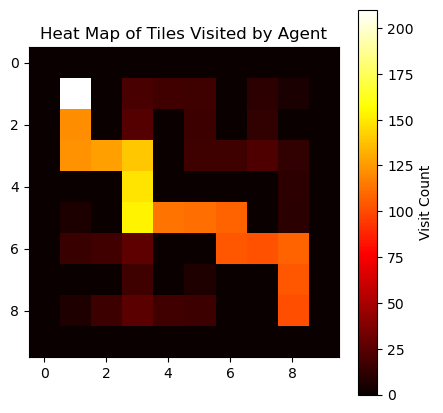

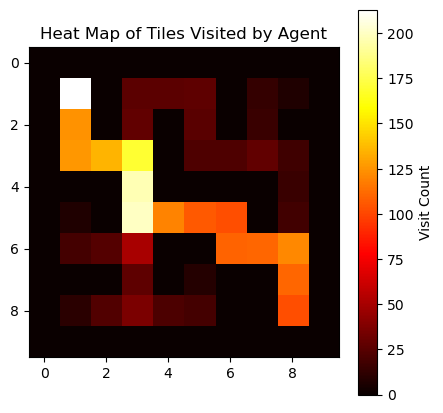

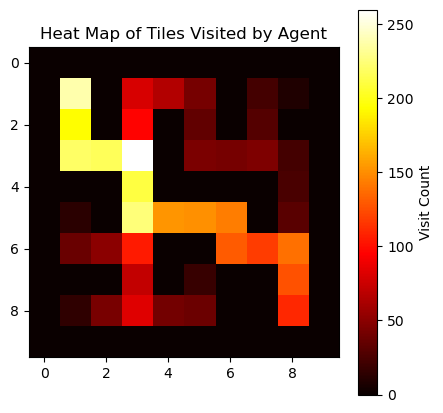

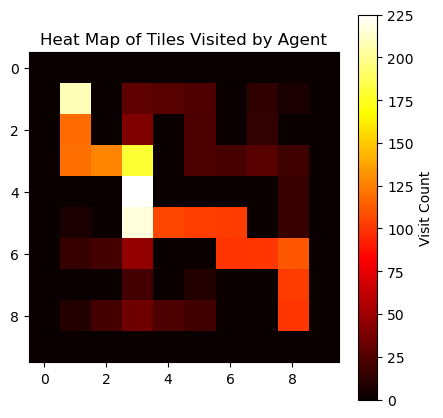

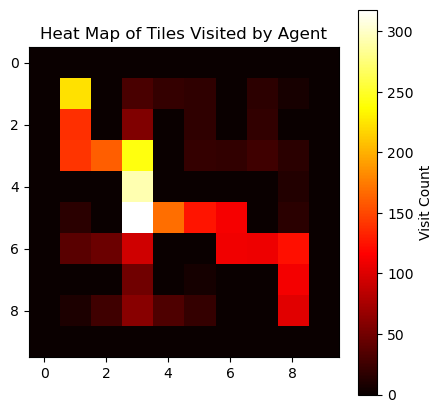

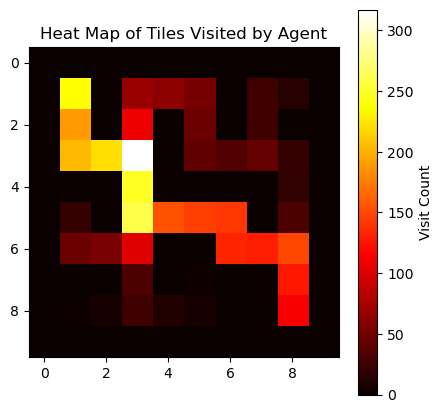

In [5]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# # List of parameter values
# learning_rates = [0.1, 0.5, 0.9]
# discount_factors = [0.1, 0.5, 0.9]
# exploration_starts = [0.1, 0.5, 1.0]

# # Data collection list for CSV
# results = []

# # Loop through each combination of parameters
# for lr in learning_rates:
#     for df in discount_factors:
#         for eps in exploration_starts:
#             # Train the agent with the current parameters
#             agent = QLearningAgent(maze, learning_rate=lr, discount_factor=df, exploration_start=eps)
#             avg_steps, avg_rewards, sub_success_rate, success_rate, visit_count = train_agent(
#                 agent, maze, num_episodes=100, show_plot=False)

#             # Save the heatmap
#             heatmap_filename = f"heatmap_{int(lr*10)}{int(df*10)}{int(eps*10 if eps != 1 else 10)}.png"
#             plt.figure(figsize=(5, 5))
#             plt.imshow(visit_count, cmap='hot', interpolation='nearest')
#             plt.colorbar(label='Visit Count')
#             plt.title('Heat Map of Tiles Visited by Agent')
#             plt.savefig(heatmap_filename)
#             plt.close()

#             # Append the results for the CSV file
#             results.append({
#                 "learning_rate": lr,
#                 "discount_factor": df,
#                 "exploration_start": eps,
#                 "average_steps": avg_steps,
#                 "average_reward": avg_rewards,
#                 "sub_goal_success_rate": sub_success_rate,
#                 "goal_success_rate": success_rate,
#                 "heatmap_file": heatmap_filename
#             })

# # Create a DataFrame and save to CSV
# df_results = pd.DataFrame(results)
# df_results.to_csv('q_learning_results.csv', index=False)

# print("Training completed and results saved to q_learning_results.csv.")


In [6]:
def test_agent2(agent, maze, num_episodes=1):
    episode_reward, episode_step, path, sub_reached = qlearning_logic(agent, maze, num_episodes, train=False)

    # Shows the path it took, total steps and total reward.
    print("Final Path:")
    for row, col in path:
        print(f"({row}, {col})-> ", end='')
    print("End Reached.")

    print("Total steps:", episode_step)
    print("Total reward:", episode_reward)

    # Visualize the maze with the agent's path.
    visualize_maze(maze, path, sub_reached)

    return episode_step, episode_reward

test_agent2(agent, maze, num_episodes=1)

ValueError: too many values to unpack (expected 4)